# 🧠 Obesity Risk Classification
Train a classifier to predict obesity risk levels (Low, Medium, High) using health metrics.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Step 1: Install and import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Step 2: Upload and load the CSV file
from google.colab import files
# Load the dataset (update the name if needed)
df = pd.read_csv("/content/gdrive/MyDrive/obesity_risk_dataset.csv")
df.head()

,bloodGlucoseLevels,bmi,bloodPressure,insulinDosage,obesityRisk
0,85.957532,17.945152,118.407345,5.168934,Low
1,109.471859,24.258290,122.889729,18.549848,Medium
2,107.920669,23.652607,138.463833,28.035095,Medium
3,130.682703,35.249571,157.115410,49.625920,High
4,134.891185,26.370720,139.848796,32.077459,High


In [6]:
# Step 3: Preprocessing
X = df.drop("obesityRisk", axis=1)
y = df["obesityRisk"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 4: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.05, random_state=42)

In [8]:
# Step 5: Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9960

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99        75
         Low       1.00      1.00      1.00        90
      Medium       0.99      1.00      0.99        85

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



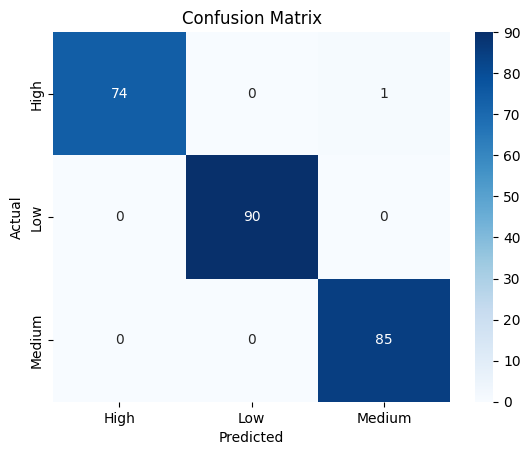

In [9]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
import joblib

# Example: Save to a folder called "models" inside MyDrive
joblib.dump(model, '/content/gdrive/MyDrive/obesity_rf_model.pkl')


['/content/gdrive/MyDrive/obesity_rf_model.pkl']